### Introduction

Real estate is the most popular and profitable business across the USA. The most important part of this business is the price prediction of the property.  Therefore, analyzing the factors affect on housing prices is useful for this type of business. In this project, I aimed to build up a machine learning model to predict the housing price of Washington and to exact the characteristics that have the most impact on the housing price of Washington. My project is focused on getting a quick idea about the price of the house and it directly helps homeowners who are trying to sell and people who are seeking to buy houses. 

I used the Pearson's Correlation Coefficient, Box plots, and one-way ANOVA statistical concepts to extract the most impact features on housing prices. After that, I applied Lasso regression to make a model. Finally, I evaluate the model using the coefficient of determinations.

### Algorithm Definition

In the following regression models, the target value can be expressed as a linear combination of the features. Mathematically the predicted values $\hat{y}$ can be written as follows.


$\displaystyle \hat{y}(w,x)=b+w_{1}x_{1}+w_{2}x_{2}+...+w_{n}x_{n}$

Here, vector $\displaystyle  w=(w_{1}+w_{2}+...+w_{n})$ is called as the coefficient and $\displaystyle b$ is called as  the intercept.

#### Least-Squares Linear Regression

In Least-Squares Linear Regression, the parameters $w$ and $b$ are estimated by minimizing the residual sum of squares $(RSS)$ between the target value and predicted value from training data.

$\displaystyle RRS(w,b) = \sum_{i=1}^{N} (y_{i} -(w \cdot x_{i} + b))^{2}$






#### Ridge Regression

In Ridge Regression, the parameters $w$ and $b$ are estimated by the same methods as the Least-Squares Linear Regression but adds parameter penalty is called regularization. 

$\displaystyle RRS_{RIDGE}(w,b) = \sum_{i=1}^{N} (y_{i} -(w \cdot x_{i} + b))^{2} + \alpha \sum_{j=1}^{p} \left| w_{j}\right|^2 $

Regularization prevents overfitting the model and reduces its complexity.  Ridge regression model used L2 regularization and regularization term is controlled by $\alpha$ parameter. 


#### Lasso regression

Lasso regression is also a regularized linear regression model that used a regularized L1 penalty for training the model. Lasso stands for Least Absolute Shrinkage and Selection Operator. It minimizes the usual sum of squared errors by minimizing the sum of absolute values of the regression coefficients. 

$\displaystyle RRS_{LASSO}(w,b) = \sum_{i=1}^{N} (y_{i} -(w \cdot x_{i} + b))^{2} + \alpha \sum_{j=1}^{p} \left| w_{j}\right| $

This model works as a model selection by setting parameter wight in w to zero for the least influential variables. Here, alpha controls the amount of L1 regularization. This model also prevents overfitting on the training set.

### Experimental Evaluation

#### Methodology

In this problem, our target variable is the housing price and it is continuous. Therefore, I used the Pearson's Correlation Coefficient to find the correlation between target variable and numerical feature variables and box plots to find the correlation between the target variable and categorical feature variables.

To grantee the correlation between the target variable and categorical variables I used a one-way ANOVA test. Then I used Least-Squares Linear, Ridge, and Lasso models to predict the housing price. After that, the determination of coefficient is used to evaluate the model accuracy.

#### Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_row=pd.read_csv(r'D:\Download\Download\DC_Properties_trimmed\DC_Properties_trimmed.csv')
df_row.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


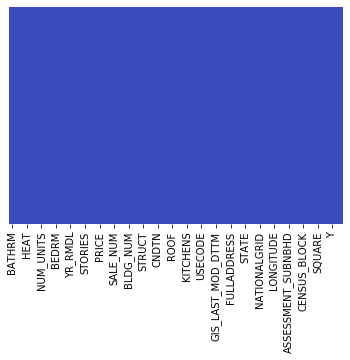

In [3]:
sns.heatmap(df_row.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [4]:
df_row.shape

(28900, 46)

In [5]:
df_row.dtypes

BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS               int64
ROOMS                   int64
BEDRM                   int64
AYB                     int64
YR_RMDL                 int64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                   int64
QUALIFIED              object
SALE_NUM                int64
GBA                     int64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS                int64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
FULLADDRESS            object
CITY                   object
STATE                  object
ZIPCODE   

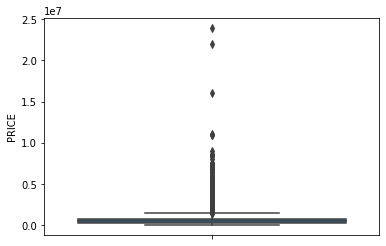

In [6]:
sns.boxplot(y=df_row['PRICE'])

In [7]:
Q1=df_row.PRICE.quantile(0.25)
Q3=df_row.PRICE.quantile(0.75)
IQR=Q3-Q1

Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR

In [8]:
df=df_row[(df_row.PRICE>Lower_limit) & (df_row.PRICE<Upper_limit)]

In [9]:
df.shape

(27507, 46)

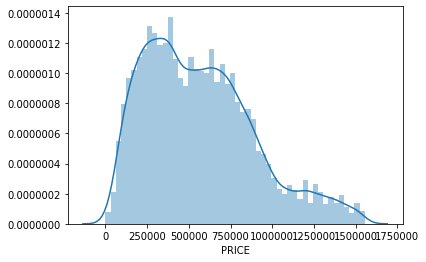

In [33]:
sns.distplot(df['PRICE'])

In [10]:
df.corr().PRICE

BATHRM          0.388836
HF_BATHRM       0.268157
NUM_UNITS       0.013441
ROOMS           0.205208
BEDRM           0.256674
AYB            -0.196919
YR_RMDL         0.082768
EYB             0.448890
STORIES         0.027317
PRICE           1.000000
SALE_NUM        0.242869
GBA             0.386347
BLDG_NUM             NaN
KITCHENS        0.042320
FIREPLACES      0.406183
USECODE         0.069656
LANDAREA        0.101159
ZIPCODE        -0.244748
LATITUDE        0.270876
LONGITUDE      -0.516028
CENSUS_TRACT   -0.413308
SQUARE         -0.496077
X              -0.516054
Y               0.270814
Name: PRICE, dtype: float64

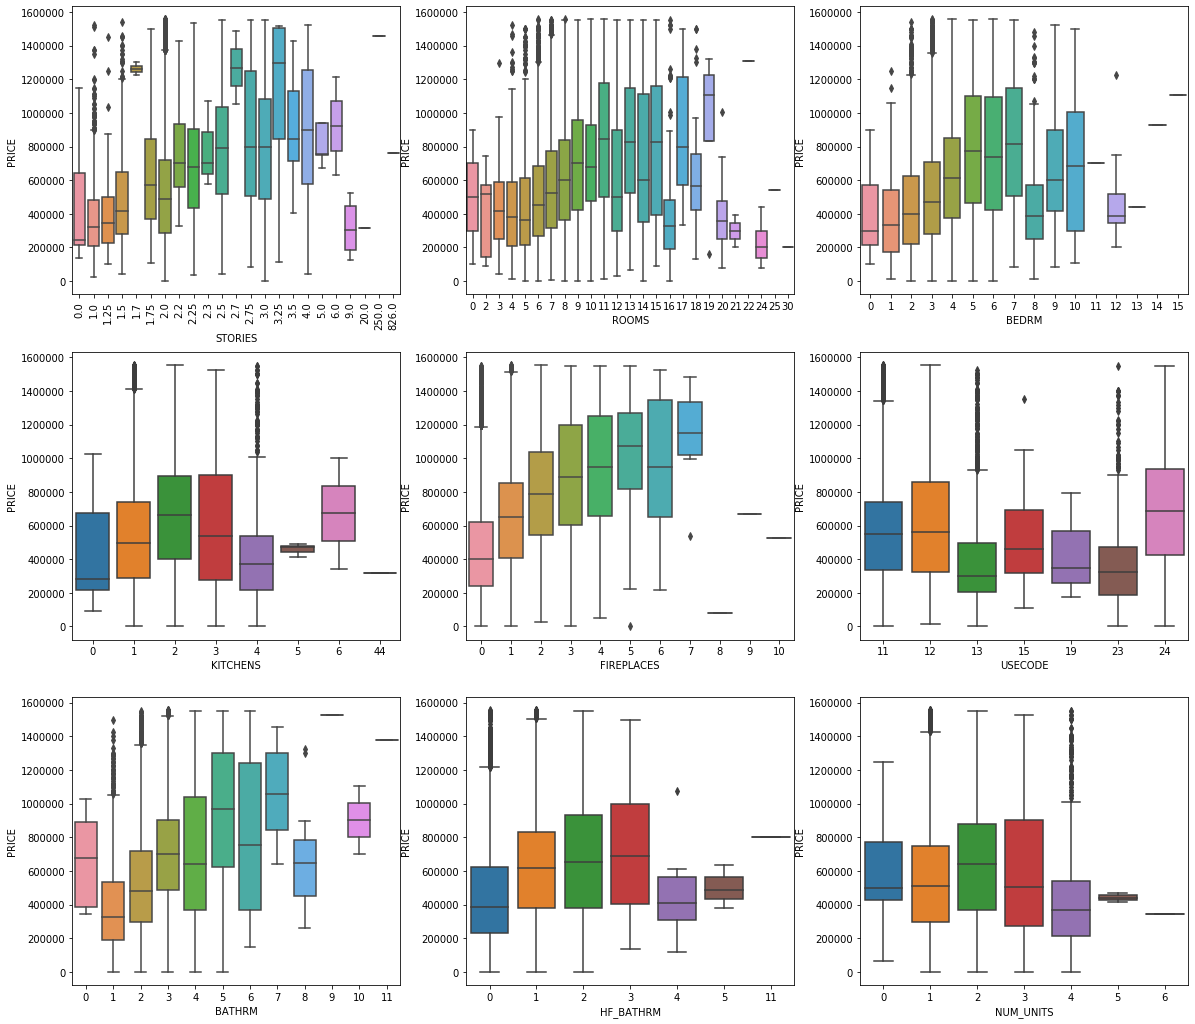

In [11]:
fig,((ax4,ax5,ax6),(ax7,ax8,ax9),(ax1,ax2,ax3))=plt.subplots(3,3,figsize=(20,18))

sns.boxplot(x='BATHRM',y='PRICE',data=df,ax=ax1)

sns.boxplot(x='HF_BATHRM',y='PRICE',data=df,ax=ax2)

sns.boxplot(x='NUM_UNITS',y='PRICE',data=df,ax=ax3)

sns.boxplot(x='STORIES',y='PRICE',data=df,ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)

sns.boxplot(x='ROOMS',y='PRICE',data=df,ax=ax5)

sns.boxplot(x='BEDRM',y='PRICE',data=df,ax=ax6)

sns.boxplot(x='KITCHENS',y='PRICE',data=df,ax=ax7)

sns.boxplot(x='FIREPLACES',y='PRICE',data=df,ax=ax8)

sns.boxplot(x='USECODE',y='PRICE',data=df,ax=ax9)


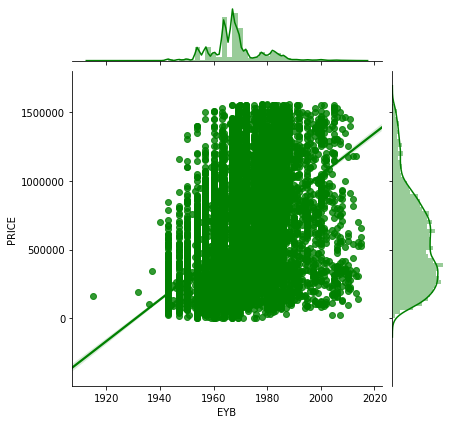

In [12]:
sns.jointplot(x='EYB',y='PRICE',data=df,kind='reg',color='g')

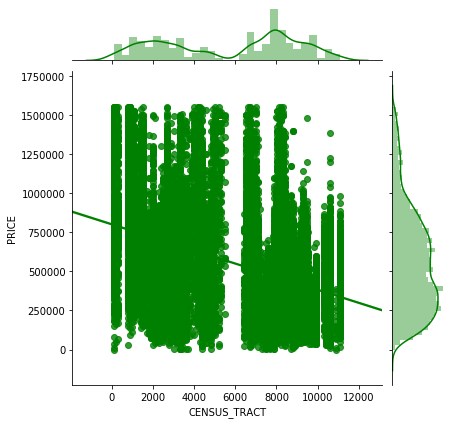

In [13]:
sns.jointplot(x='CENSUS_TRACT',y='PRICE',data=df,kind='reg',color='g')                



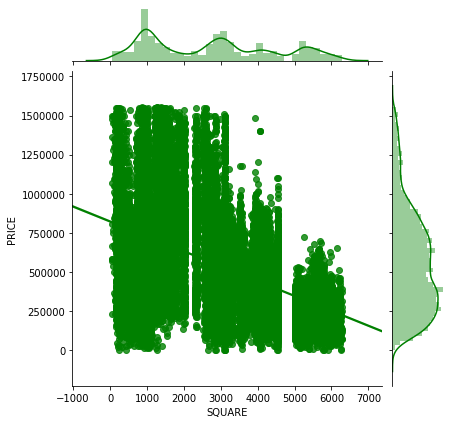

In [14]:
sns.jointplot(x='SQUARE',y='PRICE',data=df,kind='reg',color='g')

In [15]:
categorical_features=df.select_dtypes(include='object')
categorical_features.columns

Index(['HEAT', 'AC', 'SALEDATE', 'QUALIFIED', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'GIS_LAST_MOD_DTTM', 'SOURCE',
       'FULLADDRESS', 'CITY', 'STATE', 'NATIONALGRID', 'ASSESSMENT_NBHD',
       'ASSESSMENT_SUBNBHD', 'CENSUS_BLOCK', 'WARD', 'QUADRANT'],
      dtype='object')

In [16]:
df=df.replace('0','N')

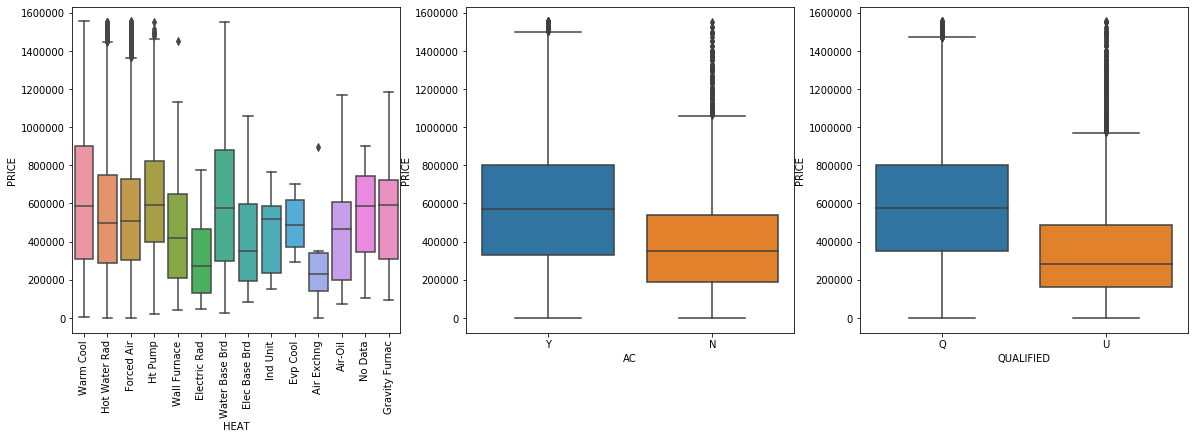

In [17]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))

sns.boxplot(x='HEAT',y='PRICE',data=df,ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

sns.boxplot(x='AC',y='PRICE',data=df,ax=ax2)

sns.boxplot(x='QUALIFIED',y='PRICE',data=df,ax=ax3)



[Text(0, 0, 'Very Good'),
 Text(0, 0, 'Above Average'),
 Text(0, 0, 'Good Quality'),
 Text(0, 0, 'Average'),
 Text(0, 0, 'Excellent'),
 Text(0, 0, 'Fair Quality'),
 Text(0, 0, 'Superior'),
 Text(0, 0, 'Exceptional-A'),
 Text(0, 0, 'Exceptional-B'),
 Text(0, 0, 'Exceptional-C')]

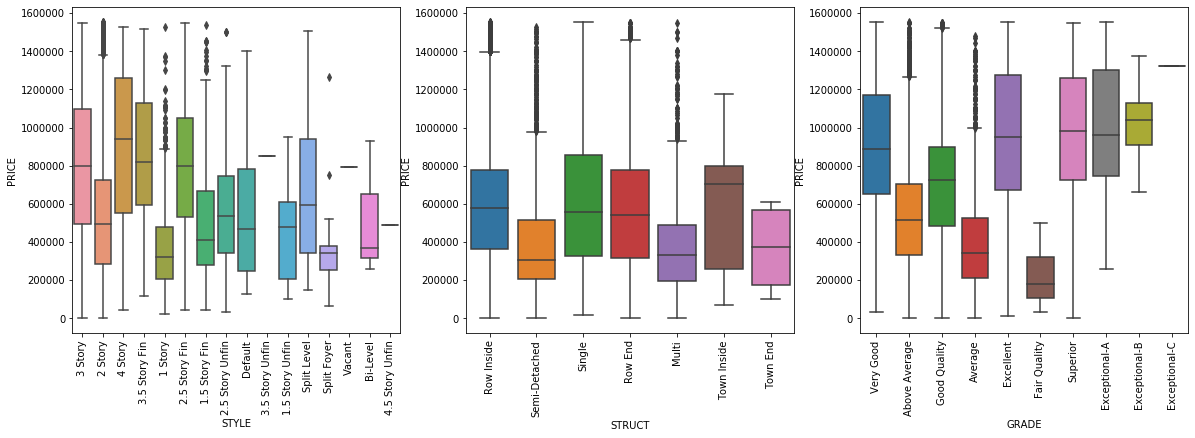

In [18]:
fig,(ax4,ax5,ax6)=plt.subplots(1,3,figsize=(20,6))

sns.boxplot(x='STYLE',y='PRICE',data=df,ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=90)

sns.boxplot(x='STRUCT',y='PRICE',data=df,ax=ax5)
ax5.set_xticklabels(ax5.get_xticklabels(),rotation=90)

sns.boxplot(x='GRADE',y='PRICE',data=df,ax=ax6)
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=90)



[Text(0, 0, 'Hardwood'),
 Text(0, 0, 'Wood Floor'),
 Text(0, 0, 'Carpet'),
 Text(0, 0, 'Hardwood/Carp'),
 Text(0, 0, 'Ceramic Tile'),
 Text(0, 0, 'Lt Concrete'),
 Text(0, 0, 'Default'),
 Text(0, 0, 'Parquet'),
 Text(0, 0, 'Resiliant'),
 Text(0, 0, 'Vinyl Sheet'),
 Text(0, 0, 'Vinyl Comp')]

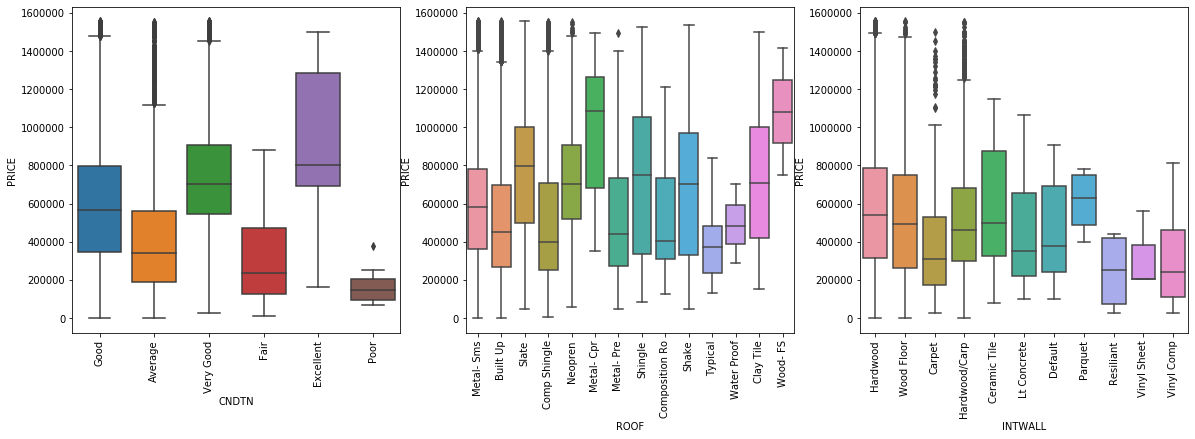

In [19]:
fig,(ax7,ax8,ax9)=plt.subplots(1,3,figsize=(20,6))

sns.boxplot(x='CNDTN',y='PRICE',data=df,ax=ax7)
ax7.set_xticklabels(ax7.get_xticklabels(),rotation=90)

sns.boxplot(x='ROOF',y='PRICE',data=df,ax=ax8)
ax8.set_xticklabels(ax8.get_xticklabels(),rotation=90)

sns.boxplot(x='INTWALL',y='PRICE',data=df,ax=ax9)
ax9.set_xticklabels(ax9.get_xticklabels(),rotation=90)


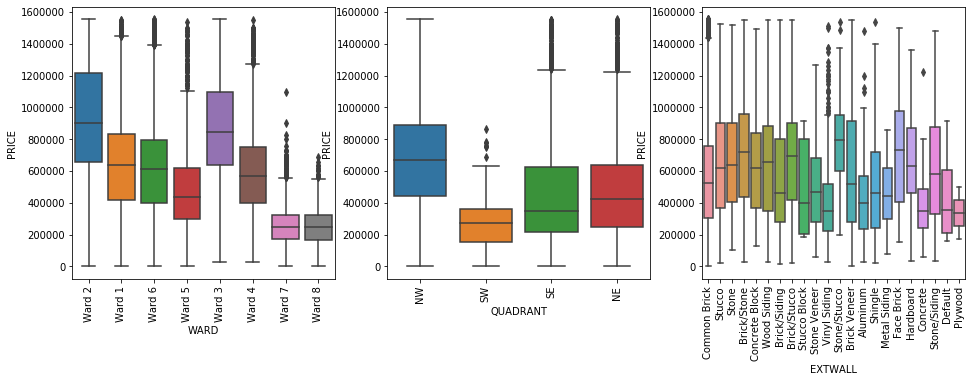

In [20]:
fig,(ax10,ax11,ax12)=plt.subplots(1,3,figsize=(16,5))


sns.boxplot(x='WARD',y='PRICE',data=df,ax=ax10)
ax10.set_xticklabels(ax10.get_xticklabels(),rotation=90)

sns.boxplot(x='QUADRANT',y='PRICE',data=df,ax=ax11)
ax11.set_xticklabels(ax11.get_xticklabels(),rotation=90)

sns.boxplot(x='EXTWALL',y='PRICE',data=df,ax=ax12)
ax12.set_xticklabels(ax12.get_xticklabels(),rotation=90)

plt.subplots_adjust(hspace = 0.6)

In [21]:
from scipy.stats import f_oneway

for i in categorical_features.columns:
    
        if i in ['GIS_LAST_MOD_DTTM','SOURCE','CITY','STATE']:
            continue
        df_anaova=df[[i,'PRICE']]
        group_anova=df_anaova.groupby([i])
        anova_test=f_oneway(group_anova.get_group(df[i].value_counts().index[0])['PRICE'],
                            group_anova.get_group(df[i].value_counts().index[1])['PRICE'])
        print('Name: {},F-statistic:{},P-value:{}'.format(i,anova_test[0],anova_test[1]))
        

Name: HEAT,F-statistic:0.09469844576724944,P-value:0.7582899434600185
Name: AC,F-statistic:1615.876169281025,P-value:0.0
Name: SALEDATE,F-statistic:0.20168680346284604,P-value:0.6553428086587456
Name: QUALIFIED,F-statistic:2275.033590497309,P-value:0.0
Name: STYLE,F-statistic:1576.5222201726867,P-value:0.0
Name: STRUCT,F-statistic:21.1303565246937,P-value:4.317733548159912e-06
Name: GRADE,F-statistic:1803.4648976077378,P-value:0.0
Name: CNDTN,F-statistic:1969.7229837432908,P-value:0.0
Name: EXTWALL,F-statistic:346.9332659525684,P-value:7.187372392669815e-77
Name: ROOF,F-statistic:391.48193934148696,P-value:2.9245210540873307e-86
Name: INTWALL,F-statistic:114.00276981371576,P-value:1.4888038475091847e-26


C:\Users\asith\Anaconda3\lib\site-packages\scipy\stats\stats.py:3234: RuntimeWarning: invalid value encountered in double_scalars
  msw = sswn / dfwn


Name: FULLADDRESS,F-statistic:nan,P-value:nan
Name: NATIONALGRID,F-statistic:19.17078836460709,P-value:0.04840649080718037
Name: ASSESSMENT_NBHD,F-statistic:5.348448870380786,P-value:0.02076884009244814
Name: ASSESSMENT_SUBNBHD,F-statistic:150.03918916051654,P-value:2.8603703896354713e-33
Name: CENSUS_BLOCK,F-statistic:294.8011038455589,P-value:3.135262130137788e-35
Name: WARD,F-statistic:751.20301470528,P-value:3.2709563191669614e-160
Name: QUADRANT,F-statistic:2882.3404730912,P-value:0.0


In [22]:
X=df[['BATHRM','HF_BATHRM','BEDRM','EYB','GBA','FIREPLACES','LONGITUDE','LATITUDE','SQUARE','CENSUS_TRACT','STYLE','GRADE','CNDTN',
      'QUADRANT','WARD','QUALIFIED','AC','ROOF','EXTWALL','STRUCT']]
     
y=df['PRICE']

In [23]:
X=pd.get_dummies(X,columns=['STYLE','GRADE','CNDTN','QUADRANT','WARD','QUALIFIED',
                            'AC','ROOF','EXTWALL','STRUCT'],drop_first=True)

In [24]:
X.head()

,BATHRM,HF_BATHRM,BEDRM,EYB,GBA,FIREPLACES,LONGITUDE,LATITUDE,SQUARE,CENSUS_TRACT,...,EXTWALL_Stucco,EXTWALL_Stucco Block,EXTWALL_Vinyl Siding,EXTWALL_Wood Siding,STRUCT_Row End,STRUCT_Row Inside,STRUCT_Semi-Detached,STRUCT_Single,STRUCT_Town End,STRUCT_Town Inside
0,4,0,4,1972,2522,5,-77.040832,38.914680,152,4201,...,0,0,0,0,0,1,0,0,0,0
3,3,1,4,1972,2401,1,-77.040129,38.915408,152,4201,...,0,0,0,0,0,1,0,0,0,0
4,3,1,3,1967,1488,1,-77.039903,38.915017,152,4201,...,0,0,0,0,0,1,0,0,0,0
5,3,1,3,1967,2692,1,-77.039716,38.915038,152,4201,...,1,0,0,0,0,1,0,0,0,0
6,3,1,3,1967,1662,0,-77.039844,38.915018,152,4201,...,0,0,0,0,0,1,0,0,0,0


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [26]:
lr=LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4, random_state=0)

lr.fit(X_train,y_train)

y_predict=lr.predict(X_test)

print('Train score: {},Test score: {}, R2 score: {}'.format(lr.score(X_train,y_train),
                                                            lr.score(X_test,y_test),
                                                            r2_score(y_test,y_predict)))


Train score: 0.5997838812730036,Test score: 0.5959283707103584, R2 score: 0.5959283707103584


In [28]:
mc=MinMaxScaler()

X_train_scaled=mc.fit_transform(X_train)

X_test_scaled=mc.transform(X_test)

alapha_value=range(1,41)

for i in alapha_value:

    ls=Lasso(alpha=i,max_iter=10000)

    ls.fit(X_train_scaled,y_train)

    y_predict=ls.predict(X_test_scaled)

    print('Train score: {},Test score: {}, R2 score: {}'.format(ls.score(X_train_scaled,y_train),
                                                                ls.score(X_test_scaled,y_test),
                                                                r2_score(y_test,y_predict)))



Train score: 0.5997825423619075,Test score: 0.5959713015441768, R2 score: 0.5959713015441768
Train score: 0.5997785456359881,Test score: 0.5960113355928383, R2 score: 0.5960113355928383
Train score: 0.5997719243165598,Test score: 0.5960477898053715, R2 score: 0.5960477898053715
Train score: 0.5997631505046648,Test score: 0.5960739176224539, R2 score: 0.5960739176224539
Train score: 0.5997518567492006,Test score: 0.5960977143322298, R2 score: 0.5960977143322298
Train score: 0.5997387242430146,Test score: 0.5961181577338991, R2 score: 0.5961181577338991
Train score: 0.5997273763126234,Test score: 0.5961278429226218, R2 score: 0.5961278429226218
Train score: 0.5997167190482526,Test score: 0.5961365744625342, R2 score: 0.5961365744625342
Train score: 0.5997052959715855,Test score: 0.5961457988514114, R2 score: 0.5961457988514114
Train score: 0.5996929760276665,Test score: 0.5961570139882746, R2 score: 0.5961570139882746
Train score: 0.5996793588715139,Test score: 0.5961672904907396, R2 sco

In [29]:


alapha_value=range(1,41)

for i in alapha_value:
    
        rd=Ridge(alpha=i)

        rd.fit(X_train_scaled,y_train)

        y_predict=rd.predict(X_test_scaled)

        print('Train score: {},Test score: {}, R2 score: {}'.format(rd.score(X_train_scaled,y_train),
                                                                rd.score(X_test_scaled,y_test),
                                                                r2_score(y_test,y_predict)))


Train score: 0.5997483170215921,Test score: 0.596142715369597, R2 score: 0.596142715369597
Train score: 0.5996924528059232,Test score: 0.5962516301231554, R2 score: 0.5962516301231554
Train score: 0.5996266285570573,Test score: 0.5963117913544972, R2 score: 0.5963117913544972
Train score: 0.5995524310703461,Test score: 0.5963396513996111, R2 score: 0.5963396513996111
Train score: 0.5994710639081304,Test score: 0.5963434425829854, R2 score: 0.5963434425829854
Train score: 0.5993835602410551,Test score: 0.5963282770572276, R2 score: 0.5963282770572276
Train score: 0.5992907933576684,Test score: 0.5962976929565159, R2 score: 0.5962976929565159
Train score: 0.5991934950384677,Test score: 0.5962542982147415, R2 score: 0.5962542982147415
Train score: 0.5990922778811949,Test score: 0.5962000949034596, R2 score: 0.5962000949034596
Train score: 0.5989876561769438,Test score: 0.5961366643297135, R2 score: 0.5961366643297135
Train score: 0.5988800636839886,Test score: 0.5960652821792147, R2 score

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)

X_poly=poly.fit_transform(X)

X_test,X_train,y_test,y_train=train_test_split(X_poly,y,test_size=0.3)

lr_poly=LinearRegression()

lr_poly.fit(X_train,y_train)

y_predict=lr_poly.predict(X_test)

print(lr_poly.score(X_train,y_train))

print(lr_poly.score(X_test,y_test))

print(r2_score(y_test,y_predict))

0.7320000386728662
-15999.309851094564
-15999.309851094564


In [31]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
for i in range(1,10):
    rf=RandomForestRegressor(n_estimators=20,max_features=i).fit(X_train,y_train)
    y_predict=rf.predict(X_test)
    print('Train score: {}.Test score: {}, R2 score: {}'.format(rf.score(X_train,y_train),
                                                                rf.score(X_test,y_test),
                                                                r2_score(y_test,y_predict)))

Train score: 0.931739144159803.Test score: 0.5799796854497429, R2 score: 0.5799796854497429
Train score: 0.9320067892235828.Test score: 0.5815854288837733, R2 score: 0.5815854288837733
Train score: 0.9331553535014772.Test score: 0.5789736640505, R2 score: 0.5789736640505
Train score: 0.9336179834111452.Test score: 0.5816305211012911, R2 score: 0.5816305211012911
Train score: 0.9327076346332364.Test score: 0.5860572199071662, R2 score: 0.5860572199071661
Train score: 0.9341249870287629.Test score: 0.5851652061940041, R2 score: 0.5851652061940041
Train score: 0.9346679021954639.Test score: 0.5828329310117797, R2 score: 0.5828329310117797
Train score: 0.9355342143362713.Test score: 0.5843505635747647, R2 score: 0.5843505635747647
Train score: 0.9339356973846513.Test score: 0.5865542754716402, R2 score: 0.5865542754716402


### Discussion

Based on the result, 'BATHRM', 'EYB', GBA, 'FIREPLACES', 'CENSUS_TRACT', 'SQUARE', 'LONGITUDEAC', 'QUALIFIED', 'STYLE', 'GRADE', 'CNDTN','WARD','QUADRANT', and 'WARD' are the good predictors of price.

Lasso Regression(alpha=5) has the highest values of accuracy scores for training and test sets as well as the  R2 score. Therefore the Lasso Regression model is recommended to predict the housing price.